1. Import Libraries
2. Read Dataset
3. Dataset Overview
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Feature Scaling
7. Model Selection
8. Cross-Validation
9. Hyperparameter Tuning 
10. Building the final model
11. Saving the Trained Model
12. Conclusion

## **Step 1 | Import Libraries**

In [51]:
!pip install xgboost

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import pickle

## **Step 2 | Read Dataset**

**Loading data**

In [53]:
#read dataset
df = pd.read_csv('anaconda_projects/E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [54]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


**Dataset Description :**
1. ID:ID Number of Customers
2. Warehouse_block:The Company have big Warehouse which is divided into block such as A,B,C,D,E
3. Mode_of_Shipment:The Company Ships the products in multiple way such as Ship, Flight and Road
4. Customer_care_calls:The number of calls made from enquiry for enquiry of the shipment
5.Customer_rating:The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)
6.Cost_of_the_Product:Cost of the Product in US Dollars
7. Prior_purchases:The Number of Prior Purchase
8. Product_importance:The company has categorized the product in the various parameter such as low, medium, high
9. Gender:Male and Female
10. Discount_offered:Discount offered on that specific product
11. Weight_in_gms:It is the weight in grams
12. Reached.on.Time_Y.N:It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time


## **Step 3 | Dataset Overview**

**Step 3.1 | Dataset Basic Information**

In [55]:
#Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**Step 3.2 | Summary Statistics for Numerical Variables**

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


**Step 3.3 | Summary Statistics for Categorical  Variables**

In [57]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


## **Step 4 | Exploratory Data Analysis (EDA)**

**Step 4.1 | Univariate Analysis**

Univariate analysis focuses on understanding the distribution, central tendency, and spread of individual variables without considering relationships

**Step 4.1.1 | Numerical Variables Univariate Analysis**

array([[<Axes: title={'center': 'Customer_care_calls'}>,
        <Axes: title={'center': 'Customer_rating'}>],
       [<Axes: title={'center': 'Cost_of_the_Product'}>,
        <Axes: title={'center': 'Prior_purchases'}>],
       [<Axes: title={'center': 'Discount_offered'}>,
        <Axes: title={'center': 'Weight_in_gms'}>]], dtype=object)

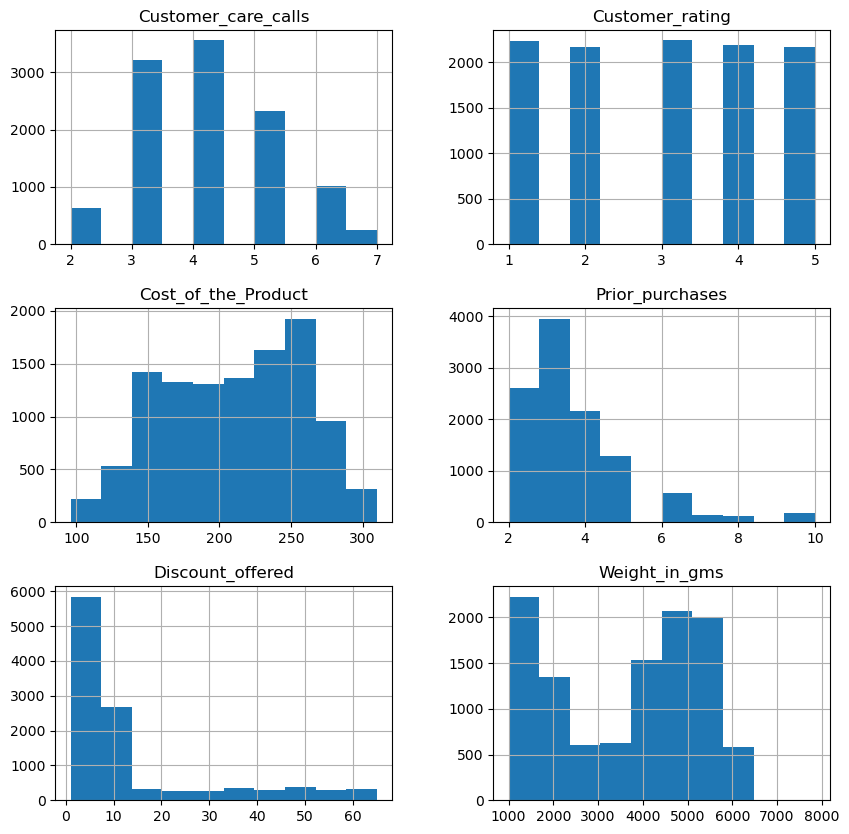

In [58]:
num_cols = [
    'Customer_care_calls','Customer_rating',
    'Cost_of_the_Product','Prior_purchases',
    'Discount_offered','Weight_in_gms'
]
df[num_cols].hist(figsize=(10,10))


**Step 4.1.2 | Categorical Variables Univariate Analysis**

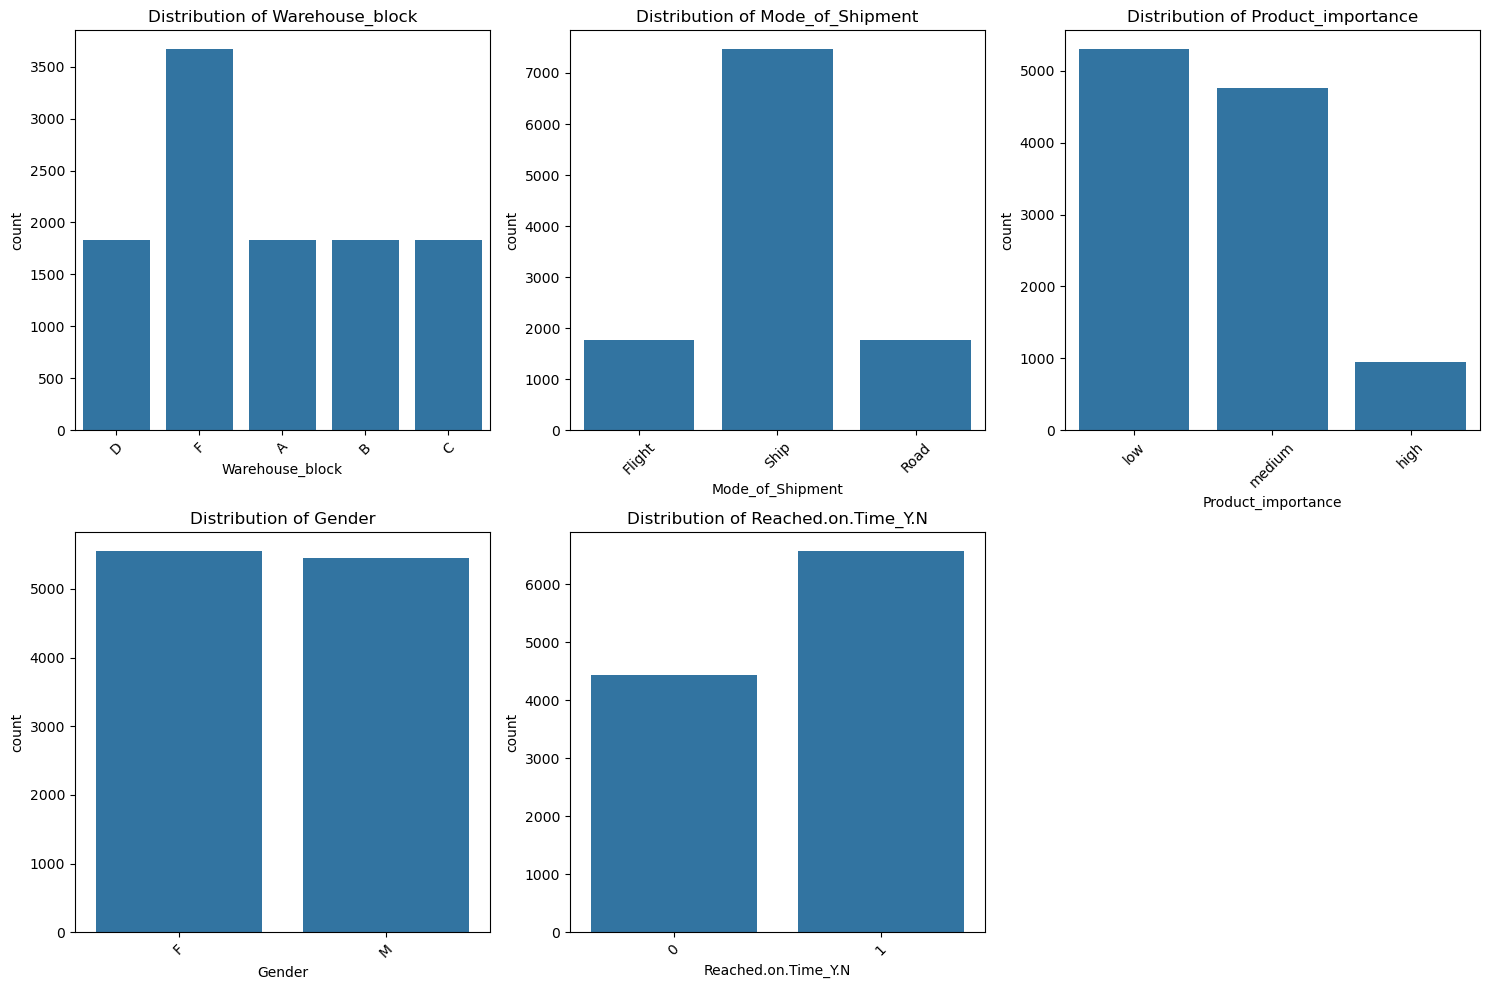

In [59]:
cat_cols = [
    'Warehouse_block',
    'Mode_of_Shipment',
    'Product_importance',
    'Gender',
    'Reached.on.Time_Y.N'
]

plt.figure(figsize=(15,10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Step 4.2 | Bivariate Analysis**

Bivariate analysis examines the relationship between independent variables and the target variable to identify patterns and predictors.

**Step 4.2.1 | Numerical Features vs Target**

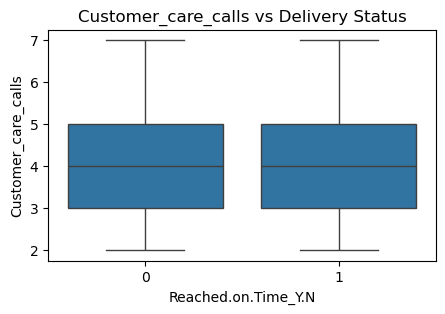

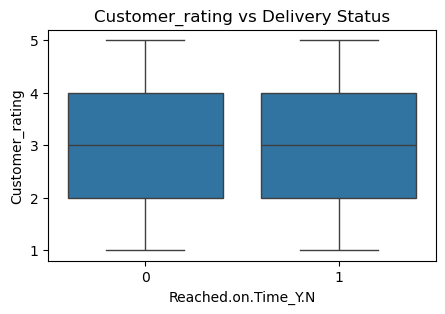

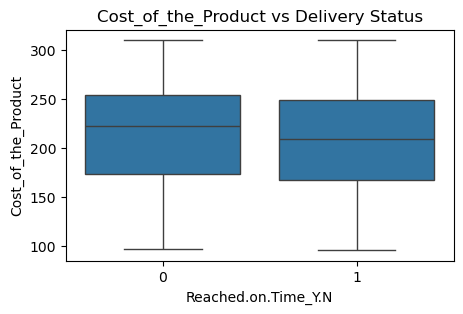

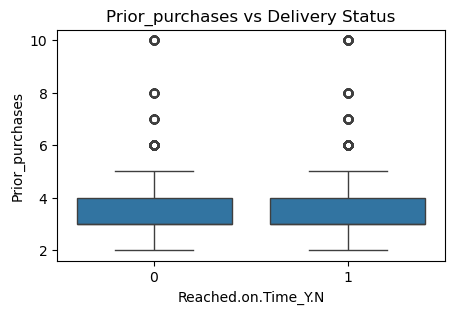

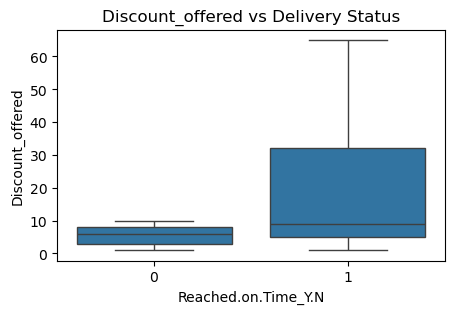

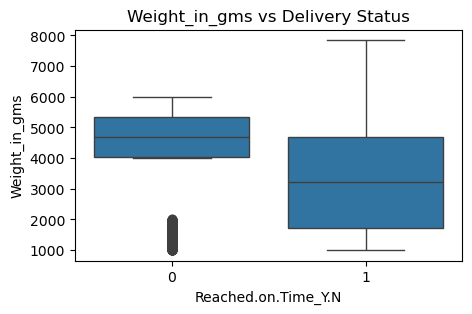

In [60]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Reached.on.Time_Y.N', y=col, data=df)
    plt.title(f'{col} vs Delivery Status')
    plt.show()


**Step 4.2.2 | Categorical Features vs Target**

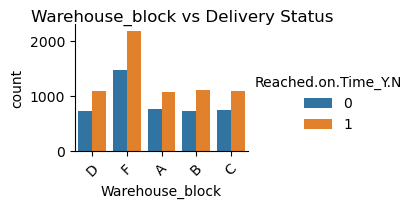

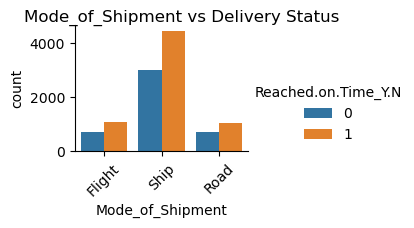

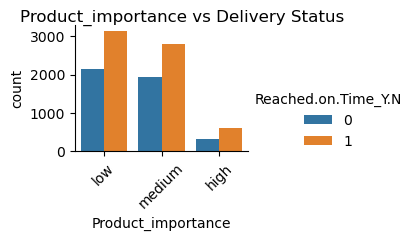

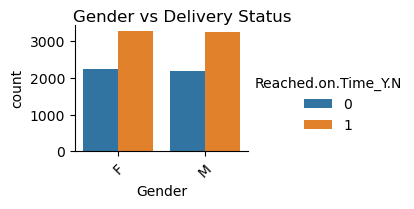

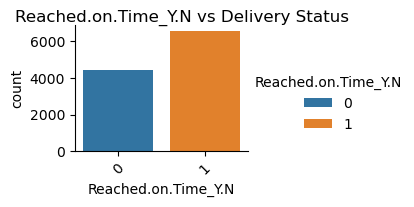

In [61]:
for col in cat_cols:
    g = sns.catplot(
        x=col,
        hue='Reached.on.Time_Y.N',
        data=df,
        kind='count',
        height=2,
        aspect=1.5
    )
    g.set_xticklabels(rotation=45)
    g.fig.suptitle(f'{col} vs Delivery Status', y=1)
    plt.show()


**EDA Conclusion** :
The gender distribution in the dataset shows nearly equal participation from male and female customers, each accounting for around 50% of the total. Product analysis indicates that heavier items weighing 2500–3500 grams have higher on-time delivery rates. Similarly, products priced below $250 are delivered more punctually compared to higher-priced items. Customer behavior plays a significant role, as a higher number of customer care calls is strongly associated with delivery delays. In contrast, repeat customers generally experience better on-time delivery outcomes. Discount analysis reveals that lower discounts (0–10%) are linked to increased delivery delays. Meanwhile, products with discounts greater than 10% show improved delivery timeliness.

## **Step 5 | Data Preprocessing**

**Step 5.1 | Missing Value Treatment**

In [62]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

print('Total no. of missing values is : ',missing_values)

Total no. of missing values is :  ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


**Step 5.2 | Removing Duplicated**

In [63]:
duplicates = df.duplicated().sum()
print(' No. of Duplicates is : ', duplicates)

 No. of Duplicates is :  0


Since there is no duplicates there is no need of removal of duplicates

**Step 5.3 | Outlier Treatment**

In [64]:
num_cols = [
    'Customer_care_calls','Customer_rating',
    'Cost_of_the_Product','Prior_purchases',
    'Discount_offered','Weight_in_gms'
]

In [65]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[num_cols] < (Q1 - 1.5 * IQR)) |(df[num_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Customer_care_calls       0
Customer_rating           0
Cost_of_the_Product       0
Prior_purchases        1003
Discount_offered       2209
Weight_in_gms             0
dtype: int64

In [66]:
outliers_percentage = (outliers_count_specified/df.shape[0])*100
outliers_percentage

Customer_care_calls     0.000000
Customer_rating         0.000000
Cost_of_the_Product     0.000000
Prior_purchases         9.119011
Discount_offered       20.083644
Weight_in_gms           0.000000
dtype: float64

**Outlier Analysis Conclusion**

Only Prior_purchases and Discount_offered contain outliers.The percentage of outliers in Prior_purchases is 9.11% and in Discount_offered is 20.08%, which are relatively high.Removing such a large proportion of data would result in a significant loss of information and may negatively impact the model’s performance.Therefore, outliers are not removed, as their presence likely represents genuine business scenarios rather than data errors.

**Step 5.4 | Encoding categorical variables**

In [67]:
# Ordinal
df['Product_importance'] = df['Product_importance'].map({
    'low': 1,
    'medium': 2,
    'high': 3
})

# Binary
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# One-Hot
df = pd.get_dummies(
    df,
    columns=['Warehouse_block', 'Mode_of_Shipment'],
    drop_first= False
)

In [68]:
df.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,1,0,44,1233,1,False,False,False,True,False,True,False,False
1,2,4,5,216,2,1,1,59,3088,1,False,False,False,False,True,True,False,False
2,3,2,2,183,4,1,1,48,3374,1,True,False,False,False,False,True,False,False
3,4,3,3,176,4,2,1,10,1177,1,False,True,False,False,False,True,False,False
4,5,2,2,184,3,2,0,46,2484,1,False,False,True,False,False,True,False,False


During feature encoding, different encoding techniques were applied based on the nature of each categorical variable.

1.Product_importance was encoded using ordinal encoding because it represents an inherent order (low < medium < high).

2.The Gender variable was encoded using binary encoding, as it contains only two distinct categories.

3.Warehouse_block and Mode_of_Shipment were encoded using one-hot encoding, since these variables are nominal in nature and do not possess any intrinsic order.

**Step 5.5 | Correlation anlaysis**

<Axes: >

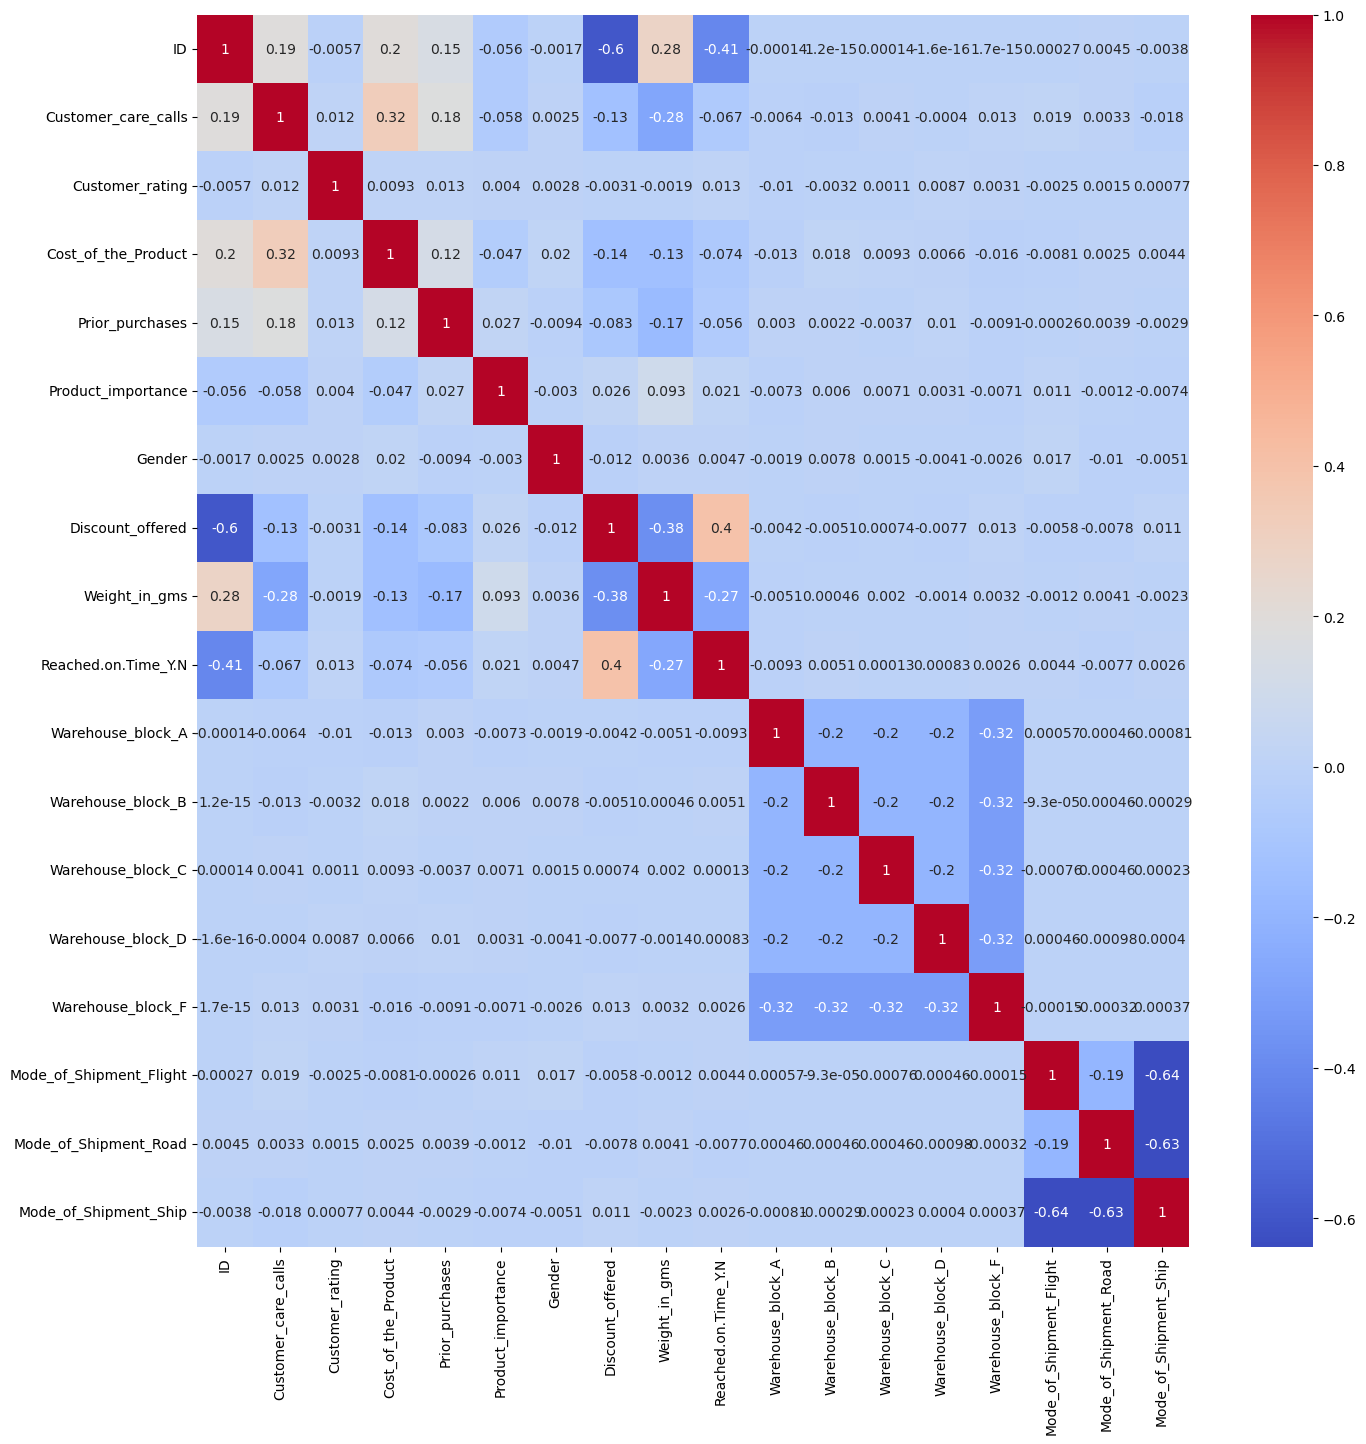

In [69]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

**Step 5.6 | Spliting the data**

In [70]:
X = df.drop(['Reached.on.Time_Y.N', 'ID'], axis=1)
y = df['Reached.on.Time_Y.N']

In [71]:
feature_names = X.columns.tolist()

with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.2, random_state=42)

## **Step 6 | Feature Scaling**

In [73]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Step 7 | Model Training and evaluation**

**Step7.1 | Logistic Regression**

In [74]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)#train the model

LogisticRegression()

In [75]:
lr_pred = lr.predict(X_test_scaled)#predit the label

In [76]:
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy Percentage : ",lr_acc*100)

Logistic Regression Accuracy Percentage :  64.22727272727272


**Step7.2 | Decision Tree Classifier**

In [77]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)#train the model

DecisionTreeClassifier()

In [78]:
dt_pred = dt.predict(X_test_scaled)#predit the label

In [79]:
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy Percentage : ",dt_acc*100)

Decision Tree Classifier Accuracy Percentage :  64.81818181818181


**Step 7.3 | Random Forest Classifier**

In [80]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)#train the model

RandomForestClassifier()

In [81]:
rf_pred = rf.predict(X_test_scaled)#predit the label

In [82]:
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy Percentage : ",rf_acc*100)

Random Forest Classifier Accuracy Percentage :  65.9090909090909


**Step 7.4 | XGBoost Classifier**

In [83]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)#train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [84]:
xgb_pred = xgb.predict(X_test_scaled)#predit the label 

In [85]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Classifier Accuracy Percentage : ",xgb_acc*100)

XGBoost Classifier Accuracy Percentage :  66.4090909090909


**7.5 Model Evaluation**

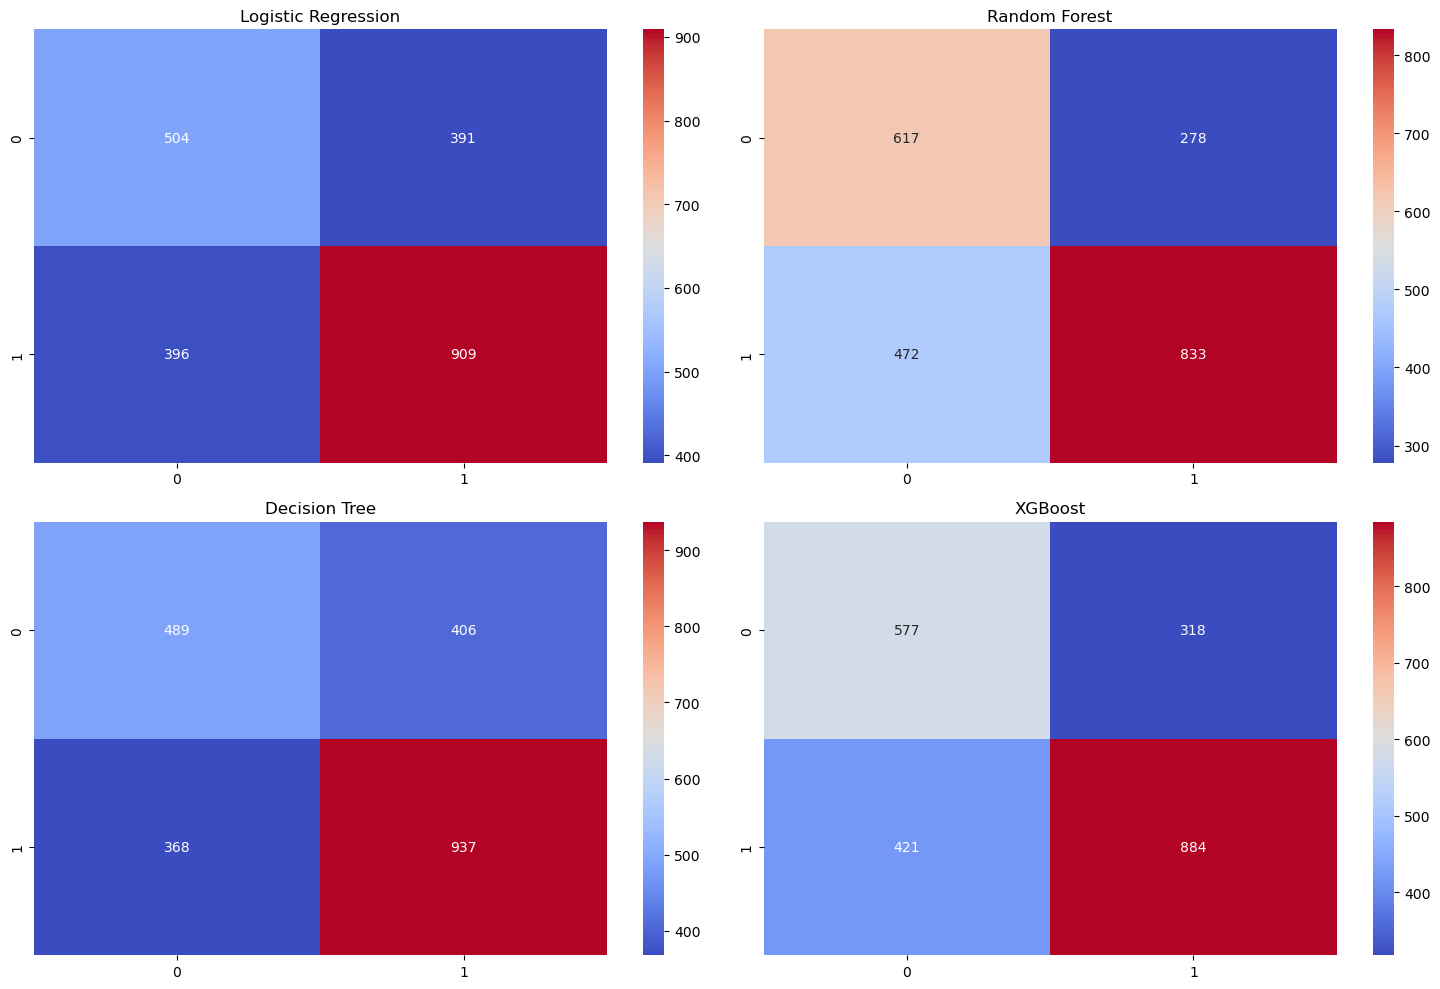

In [86]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# Logistic Regression
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,cmap='coolwarm',fmt='d',ax=ax[0, 0])
ax[0, 0].set_title("Logistic Regression")
# Decision Tree
sns.heatmap(confusion_matrix(y_test, dt_pred),annot=True,cmap='coolwarm',fmt='d',ax=ax[1, 0])
ax[1, 0].set_title("Decision Tree")
# Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True,cmap='coolwarm',fmt='d',ax=ax[0, 1])
ax[0, 1].set_title("Random Forest")
# XGBoost
sns.heatmap(confusion_matrix(y_test, xgb_pred),annot=True,cmap='coolwarm',fmt='d',ax=ax[1, 1])
ax[1, 1].set_title("XGBoost")
plt.tight_layout()
plt.show()

In [87]:

#classification report
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dt_pred))
print('Random Forest Classifier: \n', classification_report(y_test, rf_pred))
print('Xgboost Classifier: \n', classification_report(y_test, xgb_pred))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.55      0.56       895
           1       0.70      0.72      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.65      0.65      2200

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.69      0.62       895
           1       0.75      0.64      0.69      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      

By Comparing All the Model Accuracy, Random Forest Classifier is has highest Accuracy.
So, Random Classifier is choosen for this Project

## **Step 8 | Cross-Validation**

In [88]:
rf_cv = cross_val_score(rf, X_train_scaled, y_train, cv=4)
rf_cv

array([0.67090909, 0.66409091, 0.64636364, 0.65575261])

## **Step 9 | Hyperparameter Tuning - final model RandomForest Classifier**

In [89]:
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  
    n_jobs=-1
)
param_grid = {
    'n_estimators': [200],
    'max_depth': [None, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='f1',n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)
bestparams = grid_search.best_params_
print("Best Parameters:\n", bestparams)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## **Step 10 | Building the Final Model** 

In [90]:
best_params = grid_search.best_params_

ada_final = grid_search.best_estimator_

ada_final.fit(X, y)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

## **Step11 | Saving the Trained Model**

In [91]:
dump_file = 'Final_Project_pdp.pkl'
with open(dump_file, 'wb') as f:
    pickle.dump(ada_final, f)

## **CONCLUSION**
The objective of this project was to predict on-time delivery for an e-commerce company and identify the key factors affecting delivery performance. Exploratory Data Analysis showed that products weighing 2500–3500 grams and priced below $250 were more likely to be delivered on time. Warehouse operations played a major role, with Warehouse F achieving the highest proportion of on-time deliveries due to better logistical efficiency. Customer behavior also influenced outcomes, as a higher number of customer care calls was strongly associated with delivery delays. Repeat customers generally experienced more punctual deliveries compared to first-time buyers. Additionally, products offered with discounts greater than 10% showed improved on-time delivery rates. Among all evaluated models, the Random Forest classifier